In [355]:
import tensorflow as tf
import keras
import numpy as np

### loading the MNIST dataset in Keras

In [356]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [357]:
train_images.shape

(60000, 28, 28)

In [358]:
train_images.dtype

dtype('uint8')

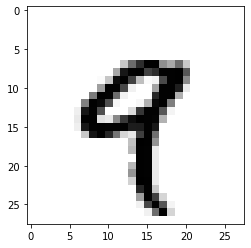

In [359]:
digit = train_images[4]

import matplotlib.pyplot as plt 
plt.imshow(digit, cmap=plt.cm.binary) 
plt.show()


In [360]:
len(train_labels)

60000

In [361]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [362]:
test_images.shape

(10000, 28, 28)

In [363]:
len(test_labels)

10000

In [364]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### the network architecture

In [ ]:
'''from tensorflow.keras import models
from tensorflow.keras import layers

network=models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))'''

# A convnet without pooling layers

In [367]:
from tensorflow.keras import layers 
from tensorflow.keras import models

model_no_max_pool = models.Sequential() 
model_no_max_pool.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model_no_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))



# Displaying a summary of the model 

In [368]:
model_no_max_pool.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


# Adding a classifier on top of the convnet

In [369]:
model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(10, activation='softmax'))

# Displaying a summary of the full model

In [370]:
model_no_max_pool.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


### the compilation step

In [ ]:
'''network.compile(optimizer='rmsprop', 
                loss = 'categorical_crossentropy', 
                metrics=['accuracy'])'''

### preparing the image data

In [ ]:
'''train_images = train_images.reshape((60000, 28 * 28,))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28,))
test_images = test_images.astype('float32') / 255'''

In [ ]:
train_images.shape

In [ ]:
test_images.shape

### preparing the labels

In [ ]:
'''from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)'''

In [ ]:
train_images.shape

In [ ]:
test_labels.shape

# Training our convnet on MNIST images

In [371]:
from keras.datasets import mnist 
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)) 
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1)) 
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',              
              loss='categorical_crossentropy',              
              metrics=['accuracy']) 

model.fit(train_images, train_labels, epochs=5, batch_size=64)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 60s 996us/sample - loss: 0.4779 - accuracy: 0.8510
Epoch 2/5
60000/60000 [==============================] - 58s 966us/sample - loss: 0.0273 - accuracy: 0.9942
Epoch 3/5
60000/60000 [==============================] - 58s 962us/sample - loss: 0.0218 - accuracy: 0.9948
Epoch 4/5
60000/60000 [==============================] - 58s 961us/sample - loss: 0.0174 - accuracy: 0.9960
Epoch 5/5
60000/60000 [==============================] - 58s 961us/sample - loss: 0.0149 - accuracy: 0.9965


### train the network

In [ ]:

'''network.fit(train_images, train_labels, epochs = 5, batch_size = 64)'''

# Evaluating the trained model

In [372]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [ ]:
'''test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc', test_acc)'''